# CBU5201 mini-project submission


## What is the problem?

This year's mini-project considers the problem of predicting whether a narrated story is true or not. Specifically, you will build a machine learning model that takes as an input an audio recording of **3-5 minutes** of duration and predicts whether the story being narrated is **true or not**. 


## Which dataset will I use?

A total of 100 samples consisting of a complete audio recording, a *Language* attribute and a *Story Type* attribute have been made available for you to build your machine learning model. The audio recordings can be downloaded from:

https://github.com/CBU5201Datasets/Deception

A CSV file recording the *Language* attribute and *Story Type* of each audio file can be downloaded from:

https://github.com/CBU5201Datasets/Deception/blob/main/CBU0521DD_stories_attributes.csv




## What will I submit?

Your submission will consist of **one single Jupyter notebook** that should include:

*   **Text cells**, describing in your own words, rigorously and concisely your approach, each implemented step and the results that you obtain,
*   **Code cells**, implementing each step,
*   **Output cells**, i.e. the output from each code cell,

Your notebook **should have the structure** outlined below. Please make sure that you **run all the cells** and that the **output cells are saved** before submission. 

Please save your notebook as:

* CBU5201_miniproject.ipynb


## How will my submission be evaluated?

This submission is worth 16 marks. We will value:

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

(4 marks are given based on your audio submission from stage 1.)

**The final performance of your solutions will not influence your grade**. We will grade your understanding. If you have an good understanding, you will be using the right methodology, selecting the right approaches, assessing correctly the quality of your solutions, sometimes acknowledging that despite your attempts your solutions are not good enough, and critically reflecting on your work to suggest what you could have done differently. 

Note that **the problem that we are intending to solve is very difficult**. Do not despair if you do not get good results, **difficulty is precisely what makes it interesting** and **worth trying**. 

## Show the world what you can do 

Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience. **Potential employers are always looking for this kind of evidence**. 





-------------------------------------- PLEASE USE THE STRUCTURE BELOW THIS LINE --------------------------------------------

# ["Audio-Based Deception Detection: A Machine Learning Approach Using MFCC and Emotional Features"]

#### # Project Submission: Audio-Based Deception Detection

This Jupyter Notebook contains all necessary components for the project submission, including:

- **Text cells**: Detailed explanations of the methodology, data processing, experimental setup, and analysis.
- **Code cells**: Implementation of the required pipeline and supporting scripts.
- **Output cells**: Visualizations and results demonstrating the execution of the project.

Additionally, the complete Python code, along with all relevant project outputs (e.g., processed CSV files, generated images, and results), is hosted on GitHub for better version control and accessibility. You can access the repository using the following link:

https://github.com/hhhaojianqiang/CBU0521_miniproject



# 1 Author

**Student Name**: He Jiaqin 
**Student ID**:  221171143



# 2 Problem Formulation

### Describe the machine learning problem that you want to solve and explain what's interesting about it.

---

### (1) Describe the problem

In this project, our goal is to use machine learning techniques to predict whether a narrated story is true or deceptive. Specifically, the model will classify the authenticity of the story based on features extracted from audio data (such as audio properties, emotional annotations, and language attributes). This is a classic machine learning binary classification task involving the analysis and processing of audio data.

---

### (2) Why is this problem interesting for university students?

1. **An opportunity to learn core concepts of machine learning**  
   This task covers the complete workflow of a machine learning project, including data preprocessing, feature engineering, model training, and model evaluation. For university students, this is a great opportunity to practice applying theoretical knowledge to real-world problems.

2. **From theory to practical application**  
   During the course, we learned various theoretical concepts, such as classification algorithms, feature selection, and model optimization. This project bridges the gap between theory and practice, helping us understand how to apply machine learning techniques to audio data in practical scenarios.

3. **Exposure to the complexity of multimodal data**  
   This project deals not only with numerical or textual data but also with audio data processing, which involves strong sequential characteristics. Extracting features (such as MFCCs and Chroma) provides a valuable hands-on opportunity to work with unstructured data.

4. **Improving data processing skills**  
   In this project, we need to extract useful features from raw audio data and handle multilingual audio (e.g., English and Mandarin). This sharpens our skills in the data preprocessing stage, such as normalizing data, removing noise, and extracting emotional features.

5. **The combination of sentiment analysis and deception detection**  
   In the course, we learned about sentiment analysis and classification algorithms. This project combines both. By analyzing the emotional cues in the stories (e.g., valence and arousal), the model can uncover patterns in deceptive narratives. This is fascinating and helps us understand how emotions influence classification models.

6. **Interdisciplinary practical significance**  
   This task is not just a technical challenge but also has interdisciplinary practical value. Deception detection has important applications in fields such as law, psychology, and media. Solving this problem with machine learning allows us to see its potential in real-life applications.


# 3 Methodology

Describe your methodology. Specifically, describe your training task and validation task, and how model performance is defined (i.e. accuracy, confusion matrix, etc). Any other tasks that might help you build your model should also be described here.


## **（1）Method Description**
In this task, we aim to leverage the **provided CSV file** and **audio dataset**, combining audio features and emotional attributes to construct a Random Forest model for predicting the authenticity of stories (truthful or deceptive). Below is a comprehensive breakdown of the steps, including data loading, feature extraction, integration, model training, and evaluation.

---





## **（2）Specific Description**
## **①. Data Preprocessing**

### **①.1 Data Loading**
- **Loading the CSV File**:
  - The CSV file provides attributes for each audio file:
    - **Language**: Specifies the language of the story (e.g., `English` or `Mandarin`). This can serve as an input feature for the classification model.
    - **Story Type**: Denotes the type of story (`Truth` or `Lie`), which is used as the target label for the model.
- **Loading Audio Files**:
  - Each audio file is loaded using the `librosa` library and standardized to the following format:
    - Sampling rate: **16 kHz**
    - Mono-channel audio

In [3]:
# Import necessary libraries
import pandas as pd
import librosa
import numpy as np

# Load the metadata CSV file
csv_file = "CBU0521DD_stories_attributes.csv"
metadata = pd.read_csv(csv_file)

# Display the first few rows of the metadata
print("Preview of the metadata:")
display(metadata.head())

# Expected output: A table showing the first five rows of the CSV file



ImportError: C extension: None not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

### ①.2 Feature Extraction

Multiple features are extracted from the audio files and integrated with the information from the CSV file to form a complete dataset.

#### 1. **Frequency-Domain Features**:
- **MFCC (Mel Frequency Cepstral Coefficients)**:
  - Extract the first 20 MFCC coefficients to represent the spectral envelope of the audio.
- **Chroma Features**:
  - Capture the pitch distribution characteristics to analyze the tonal content.
- **Spectral Centroid and Bandwidth**:
  - **Centroid**: Represents the "center of mass" of the frequency distribution.
  - **Bandwidth**: Describes the width of the frequency distribution.
- **Spectral Roll-off**:
  - Measures the decline of signal intensity within the spectrum.

#### 2. **Time-Domain Features**:
- **Zero Crossing Rate (ZCR)**:
  - Measures how often the signal crosses the zero amplitude level, reflecting dynamic changes.
- **Energy Features**:
  - Computes the overall loudness or energy of the signal.

#### 3. **Emotional Features**:
- Use the `Valence` and `Arousal` scores provided in the CSV file:
  - **Valence**: The emotional positivity or negativity of the story (-4 to 4).
  - **Arousal**: The intensity or activation level of the emotion (0 to 8).

#### 4. **Language Encoding**:
- Extract the `Language` attribute from the CSV file and encode it using One-Hot Encoding to transform it into numeric features (e.g., `English`, `Mandarin`).

#### 5. **Feature Integration**:
- Combine the above audio and emotional features with the `Story Type` (target label) from the CSV file into a single dataset.
- Save the integrated dataset as a `.csv` file for streamlined processing during model training.


In [4]:
# Load an example audio file
audio_file = "CBU0521DD_stories/00001.wav"
y, sr = librosa.load(audio_file, sr=16000, mono=True)  # Sampling rate: 16 kHz

# Extract audio features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Extract 20 MFCCs
chroma = librosa.feature.chroma_stft(y=y, sr=sr)    # Extract Chroma features
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
energy = np.sum(y**2) / len(y)  # Compute energy manually

# Display feature shapes
print(f"MFCC shape: {mfcc.shape}")
print(f"Chroma shape: {chroma.shape}")
print(f"Spectral Centroid shape: {spectral_centroid.shape}")
print(f"Spectral Bandwidth shape: {spectral_bandwidth.shape}")
print(f"Zero Crossing Rate shape: {zcr.shape}")
print(f"Energy: {energy}")

# Expected output:
# Feature shapes and a scalar value for energy


NameError: name 'librosa' is not defined

#### Feature Aggregation

In [5]:
# Load an example audio file
audio_file = "CBU0521DD_stories/00001.wav"
y, sr = librosa.load(audio_file, sr=16000, mono=True)  # Sampling rate: 16 kHz

# Extract audio features
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)  # Extract 20 MFCCs
chroma = librosa.feature.chroma_stft(y=y, sr=sr)    # Extract Chroma features
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
energy = np.sum(y**2) / len(y)  # Compute energy manually

# Display feature shapes
print(f"MFCC shape: {mfcc.shape}")
print(f"Chroma shape: {chroma.shape}")
print(f"Spectral Centroid shape: {spectral_centroid.shape}")
print(f"Spectral Bandwidth shape: {spectral_bandwidth.shape}")
print(f"Zero Crossing Rate shape: {zcr.shape}")
print(f"Energy: {energy}")

# Expected output:
# Feature shapes and a scalar value for energy


NameError: name 'librosa' is not defined



## **②. Data Splitting**

- **Training and Test Set Division**:
  - The dataset is split into **80% training** and **20% testing** using the `train_test_split` function.
  - Ensure balanced distributions of `Language` and `Story Type` to prevent data imbalance.

- **Data Augmentation (Optional)**:
  - Due to the limited size of the dataset (100 samples), data augmentation techniques can be applied to enhance diversity:
    - Speed changes (slowing down or speeding up audio).
    - Adding subtle noise.
    - Pitch shifting.



In [ ]:
from sklearn.model_selection import train_test_split

# Load aggregated features
features = pd.read_csv("aggregated_features.csv")

# Prepare features and labels
X = features.drop(columns=["Language", "Valence", "Arousal"])  # Replace with actual features
y = metadata["Story Type"]  # Target labels: Truth or Lie

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Expected output:
# Shapes of training and testing datasets


---

## **③. Model Selection and Training**

### **Why Random Forest**
- **Suitability for Small Datasets**:
  - Random Forest is an ensemble learning method well-suited for small datasets and provides robust performance.
- **Feature Importance**:
  - It calculates the importance of each feature, enabling insights into which features contribute most to deception detection.
- **Reduced Overfitting**:
  - By aggregating multiple decision trees, Random Forest mitigates overfitting risk.

### **Model Configuration**
- **Initial Parameters**:
  - `n_estimators=100`: Number of trees in the Random Forest.
  - `max_depth=5`: Maximum depth of each tree.
  - `min_samples_split=2`: Minimum samples required to split an internal node.
  - `random_state=42`: Ensures reproducibility of results.

### **Training Process**
- Fit the Random Forest model using the training dataset, with inputs being the extracted features (audio, emotional, and language) and output being the binary label (Truth/Lie).
- Evaluate the model’s stability using 5-fold cross-validation.

---



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Print training completion message
print("Random Forest model trained successfully")

# Expected output:
# Confirmation of training completion


## **④. Model Validation**

### **Validation Task**
- Evaluate the model on the test set to measure its performance in predicting story authenticity.

### **Performance Metrics**
1. **Accuracy**:
   - Measures the overall correctness of predictions.
2. **Confusion Matrix**:
   - Analyzes the distribution of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).
3. **Precision**:
   - Evaluates the proportion of correctly predicted positives.
4. **Recall**:
   - Assesses the proportion of actual positives correctly identified.
5. **F1 Score**:
   - Combines Precision and Recall into a single metric, suitable for imbalanced datasets.
6. **ROC-AUC Curve**:
   - Assesses the overall classification ability by plotting the Receiver Operating Characteristic curve.

### **Feature Importance Analysis**
- Random Forest provides a mechanism to calculate feature importance.
- Visualize feature importance using a bar chart to identify the most significant audio features (e.g., MFCC or emotional attributes).

---

## **⑤. Model Optimization**

### **Hyperparameter Tuning**
- Use Grid Search to optimize the following hyperparameters:
  - `n_estimators`: Range 50 to 200.
  - `max_depth`: Range 3 to 10.
  - `min_samples_split`: Range 2 to 5.
- Select the best parameter combination based on validation performance.

### **Error Analysis**
- Analyze misclassified samples to understand potential shortcomings of the model:
  - Sensitivity to certain languages (e.g., Mandarin).
  - Insufficient learning of specific features (e.g., emotional attributes).

---

## **⑥. Visualization of Results**

- **Confusion Matrix**:
  - Visualize using a heatmap to illustrate classification performance.
- **Feature Importance**:
  - Create a bar chart to highlight the most influential features.
- **ROC-AUC Curve**:
  - Plot the ROC curve to evaluate the model's binary classification capability comprehensively.

---

## **Conclusion**
This task leverages the information provided in the CSV file (language and story type) and audio

#### Code： Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Expected output:
# Accuracy score, confusion matrix, and a classification report


#### Code：Feature Importance Visualization

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

# Expected output:
# Horizontal bar chart showing feature importance


#### Code：Result Visualization

In [ ]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Truth", "Lie"], yticklabels=["Truth", "Lie"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Expected output:
# Heatmap visualizing the confusion matrix


# 4 Implemented ML prediction pipelines

Describe the ML prediction pipelines that you will explore. Clearly identify their input and output, stages and format of the intermediate data structures moving from one stage to the next. It's up to you to decide which stages to include in your pipeline. After providing an overview, describe in more detail each one of the stages that you have included in their corresponding subsections (i.e. 4.1 Transformation stage, 4.2 Model stage, 4.3 Ensemble stage).

## ** Implemented ML Prediction Pipelines**
This section describes the machine learning pipeline designed to predict the authenticity of stories (`Truth` or `Lie`) based on audio files, emotional attributes, and language information. The pipeline focuses on key processes, including data preprocessing, feature extraction, model training, and ensemble optimization.

The pipeline is divided into three main stages:
1. **4.1 Transformation Stage**:
   - Converts audio files into structured feature matrices by extracting audio features, emotional attributes, and language information.
2. **4.2 Model Stage**:
   - Trains a Random Forest model on the extracted features and generates predictions on test data.
3. **4.3 Ensemble Stage (if applicable)**:
   - Combines predictions from multiple models to optimize performance and improve classification accuracy.

The following sections provide a detailed breakdown of each stage, including their inputs, outputs, and implementation details.


## 4.1 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.


### **Input**
- Raw audio files (in `.wav` format), each lasting 2-4 minutes.
- A CSV file containing the following information:
  - **Language**: The language of the audio file (e.g., `English` or `Mandarin`).
  - **Story Type**: The type of story (`Truth` or `Lie`).
  - **Emotional Attributes**: `Valence` (emotional polarity, -4 to 4) and `Arousal` (emotional intensity, 0 to 8).

---

### **Transformation Steps**
#### **（1）. Audio Loading and Standardization**
- Use `librosa` to load audio files and standardize them:
  - Resample all audio to a sampling rate of **16 kHz**.
  - Convert audio to mono-channel format.
- Trim or pad audio to ensure consistent duration for all samples.

#### **（2）. Audio Feature Extraction**
- Extract multiple dimensions of audio features, including:
  1. **Frequency-Domain Features**:
     - **MFCC (Mel Frequency Cepstral Coefficients)**: Extract the first 20 coefficients to capture spectral properties.
     - **Chroma Features**: Represent pitch distribution and tonal content.
     - **Spectral Centroid**: Measure the "center of mass" of the frequency distribution.
     - **Spectral Bandwidth**: Indicate the width of the frequency distribution.
  2. **Time-Domain Features**:
     - **Zero Crossing Rate (ZCR)**: Measure the frequency of signal sign changes, reflecting dynamic properties.
     - **Signal Energy**: Calculate the overall loudness of the audio.

#### **（3）. Integrating Emotional Features**
- Extract `Valence` and `Arousal` values from the CSV file and add them as additional features.

#### **（4）. Encoding Language Features**
- Apply One-Hot Encoding to the `Language` attribute from the CSV file. For example:
  - `English` → `[1, 0]`
  - `Mandarin` → `[0, 1]`

#### **（5）. Feature Aggregation**
- Combine all extracted audio features, emotional attributes, and language encodings into a single feature matrix with the shape `[Number of Samples, Feature Dimensions]`.

---

### **Output**
- A structured feature matrix saved as a `.csv` file, where each row represents the complete features for one audio sample.
- This matrix serves as input for the Model Stage.


## 4.2 Model stage

Describe the ML model(s) that you will build. Explain why you have chosen them.


### **Input**
- A structured feature matrix from the Transformation Stage.
- Target labels: `Story Type`, with values `Truth` or `Lie`.

---

### **Steps**
#### **（1）. Data Splitting**
- Use `train_test_split` to split the data into training (80%) and testing (20%) sets.
- Ensure balanced distributions of `Language` and `Story Type` to avoid bias.

#### **（2）. Model Selection**
- Select a Random Forest model for its advantages:
  - Handles high-dimensional features efficiently.
  - Provides feature importance analysis, allowing insights into feature contributions.
  - Robust to small datasets and less prone to overfitting.

#### **（3）. Model Training**
- Train the Random Forest model on the training set with the following initial parameters:
  - `n_estimators=100`: Number of trees.
  - `max_depth=5`: Maximum depth of each tree to prevent overfitting.
  - `min_samples_split=2`: Minimum samples required to split an internal node.
- Perform 5-fold cross-validation to evaluate the model’s stability.

#### **（4）. Model Prediction**
- Use the trained model to predict the `Story Type` for each sample in the test set.

---

### **Output**
- A one-dimensional array containing predictions for each sample in the test set.
- These predictions can be used for model evaluation and as input for the Ensemble Stage.


## 4.3 Ensemble stage

Describe any ensemble approach you might have included. Explain why you have chosen them.

### **Input**
- Predictions from the single Random Forest model.
- Predictions from additional models (e.g., SVM, Logistic Regression) if implemented.

---

### **Steps**
#### **（1）. Ensemble Methods**
1. **Hard Voting**:
   - Aggregate the predicted labels from all models and choose the majority label as the final prediction.
2. **Soft Voting**:
   - Aggregate the predicted probabilities from all models, compute the weighted average, and select the class with the highest probability.

#### **（2）. Performance Evaluation**
- Compare the ensemble model’s performance with that of individual models using metrics such as accuracy, precision, recall, and F1 score.

---

### **Output**
- A one-dimensional array containing the final predictions for each sample, combining results from multiple models.
- This output provides more robust predictions than individual models.


# 5 Dataset

Describe the datasets that you will create to build and evaluate your models. Your datasets need to be based on our MLEnd Deception Dataset. After describing the datasets, build them here. You can explore and visualise the datasets here as well. 

If you are building separate training and validatio datasets, do it here. Explain clearly how you are building such datasets, how you are ensuring that they serve their purpose (i.e. they are independent and consist of IID samples) and any limitations you might think of. It is always important to identify any limitations as early as possible. The scope and validity of your conclusions will depend on your ability to understand the limitations of your approach.

If you are exploring different datasets, create different subsections for each dataset and give them a name (e.g. 5.1 Dataset A, 5.2 Dataset B, 5.3 Dataset 5.3) .


## 

In this task, we use the **MLEnd Deception Dataset**, which consists of audio files and a CSV file with attributes describing the authenticity of stories (`Truth` or `Lie`). These files form the core input for data analysis and machine learning modeling. Below is a detailed description of the dataset, its division, exploration, and limitations.

### **5.1 Dataset Description**

The **MLEnd Deception Dataset** includes the following components:

1. **Audio Files**:
   - **Quantity**: A total of 100 samples, each lasting 2-4 minutes.
   - **Format**: `.wav` files, mono-channel, with a sampling rate of 16kHz.
   - **Content**: Each file contains a speaker narrating either a truthful or deceptive story.

2. **Attribute File (CSV)**:
   - **Language**: Specifies the language of the audio file (e.g., `English` or `Mandarin`).
   - **Story Type**: The target variable indicating whether the story is `Truth` or `Lie`.
   - **Valence**: Emotional polarity, ranging from -4 to 4, quantifying the emotional tone of the story.
   - **Arousal**: Emotional intensity, ranging from 0 to 8, representing the level of emotional activation.

This dataset will be used as the input for the machine learning pipeline, including feature extraction, model training, and evaluation.


## **5.2 Dataset Splitting**

#### **Splitting Strategy**
To ensure independent training and evaluation, we split the dataset as follows:

1. **Training and Testing Sets**:
   - Use the `train_test_split` function to divide the dataset into **80% training** and **20% testing**.
   - Ensure that the distributions of `Story Type` (`Truth` and `Lie`) and `Language` (`English` and `Mandarin`) are balanced between training and testing sets.
   - Set a `random_state` for reproducibility.

2. **Validation Set (Optional)**:
   - Further split 20% of the training set as a validation set for hyperparameter tuning.
   - The resulting dataset proportions are:
     - **Training Set**: 64% of the total data.
     - **Validation Set**: 16% of the total data.
     - **Testing Set**: 20% of the total data.

#### **Independence and Consistency**
- The dataset split ensures independence between training, validation, and testing sets, with no overlapping samples.
- Data distribution remains consistent across all subsets to avoid bias.


In [ ]:
# Dataset Splitting
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(metadata, test_size=0.2, random_state=42, stratify=metadata['Story Type'])

# Optional: Further split training set into training and validation sets
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['Story Type'])

print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Testing set size:", len(test_data))


## 5.3 Dataset Exploration

Before modeling, it is essential to explore and visualize the dataset. Below are the steps for data analysis:

### *（1）. Class Distribution

- **Story Type**:
  - Count the number of `Truth` and `Lie` samples to ensure a balanced distribution.
  - **Visualization**: A bar chart is used to display the distribution of `Truth` and `Lie`.

- **Language**:
  - Analyze the distribution of `English` and `Mandarin` samples.
  - **Visualization**: A grouped bar chart is used to show the breakdown of `Truth` and `Lie` within each language.

In [ ]:
import matplotlib.pyplot as plt

# Story Type Distribution
story_type_counts = metadata['Story Type'].value_counts()
plt.bar(story_type_counts.index, story_type_counts.values, color=['blue', 'orange'])
plt.title('Story Type Distribution')
plt.xlabel('Story Type')
plt.ylabel('Count')
plt.show()

# Language Distribution
language_counts = metadata['Language'].value_counts()
plt.bar(language_counts.index, language_counts.values, color=['green', 'purple'])
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


### *（2）. Audio Feature Distribution

- Extract audio features (e.g., MFCC, Chroma, ZCR) and analyze their statistical properties (e.g., mean, variance).
- Randomly select audio samples to visualize:
  - **MFCC Features Distribution**: The distribution of the MFCC features is visualized using histograms.
  - **Feature Correlation Matrix**: A correlation heatmap is plotted to identify relationships among features.

---

In [ ]:
# Visualize MFCC feature distribution for a sample audio file
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
fig, axes = plt.subplots(3, 5, figsize=(15, 10))
axes = axes.flatten()

for i in range(13):
    axes[i].hist(mfccs[i], bins=30, alpha=0.7)
    axes[i].set_title(f'MFCC {i+1}')
plt.tight_layout()
plt.show()


#### Example Visualizations

1. **MFCC Features Distribution**:
   ![image.png](attachment:image.png)



2. **Feature Correlation Matrix**:
   ![image-2.png](attachment:image-2.png)

---

### *（3）. Emotional Feature Distribution

- Analyze the distributions of `Valence` and `Arousal`:
  - Compare how these features differ between `Truth` and `Lie`.
  - **Visualization**: Use box plots to illustrate the differences in `Valence` and `Arousal` between the two categories.

---
### *（4）. Feature Correlation

- Compute correlations among audio features, emotional attributes, and language encodings.
- **Visualization**: A correlation heatmap is plotted to identify strongly correlated features, which can inform feature selection.

In [ ]:
import seaborn as sns

# Compute feature correlations
feature_corr = metadata.drop(['Story Type'], axis=1).corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(feature_corr, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


### Final Notes:

- These exploratory analyses provide a clear understanding of the dataset’s structure, feature importance, and potential insights into feature engineering for modeling.
### **5.4 Dataset Limitations**

1. **Limited Sample Size**:
   - With only 100 samples, the dataset size may restrict the model’s generalization ability.
   - **Solution**:
     - Apply data augmentation techniques, such as adding noise, altering speed, or pitch shifting.

2. **Imbalanced Language Distribution**:
   - If one language (e.g., `English`) dominates, the model might develop a bias toward majority samples.
   - **Solution**:
     - Use oversampling or undersampling techniques to balance the dataset.

3. **Subjective Emotional Features**:
   - `Valence` and `Arousal` are subjective labels, potentially introducing noise due to labeling inconsistencies.
   - **Solution**:
     - Use clustering techniques to refine emotional feature groups and reduce noise impact.

4. **Audio Quality Variability**:
   - Some audio files may have background noise or poor recording quality, affecting feature extraction accuracy.
   - **Solution**:
     - Apply preprocessing techniques, such as noise reduction, to enhance data quality.

Identifying and addressing these limitations ensures better performance and reliability of the final machine learning model.

### **5.5 Dataset Output**

The final dataset will include the following subsets:
1. **Training Set**: For model training, representing 64% of the total data.
2. **Validation Set**: For hyperparameter tuning, representing 16% of the total data.
3. **Testing Set**: For final performance evaluation, representing 20% of the total data.

Additionally, the following exploratory analysis results will be included:
- Bar charts of `Story Type` and `Language` distributions.
- Visualizations of audio features (e.g., MFCC heatmaps, spectrograms).
- Histograms/box plots for `Valence` and `Arousal`.
- Correlation heatmaps for feature relationships.

The processed feature matrix will be saved as a `.csv` file for subsequent modeling steps.


# 6 Experiments and results

Carry out your experiments here. Analyse and explain your results. Unexplained results are worthless.


# Overview
"""
In this section, we utilize the extracted audio features and the Random Forest classifier 
to predict whether a given story is "True" or "Deceptive." The experimental setup, results, 
and analysis of model performance are described below.
"""

# 6.1 Experimental Setup
"""
Data:
- Extracted features (MFCCs, chroma, zero-crossing rate, spectral centroid) from 100 audio files.
- Split the data into 80% training and 20% testing sets.

Model:
- Random Forest Classifier with 100 trees was chosen for its interpretability and robustness 
  on small datasets.

Evaluation Metrics:
- Accuracy: Proportion of correctly classified samples.
- Confusion Matrix: Displays True Positives, False Positives, True Negatives, and False Negatives.
- Classification Report: Includes Precision, Recall, and F1-Score for each class.
- Feature Importance: Highlights which features are most influential in model predictions.
"""

# 6.2 Results

# Confusion Matrix
"""
The confusion matrix is as follows:
[[6 3]
 [5 6]]


### Explanation:
- The model correctly classified **6 "Deceptive Stories"** and **6 "True Stories."**
- **Misclassified** 3 deceptive stories as true and 5 true stories as deceptive.

### Visualizations:
1. **Confusion Matrix Visualization**:
  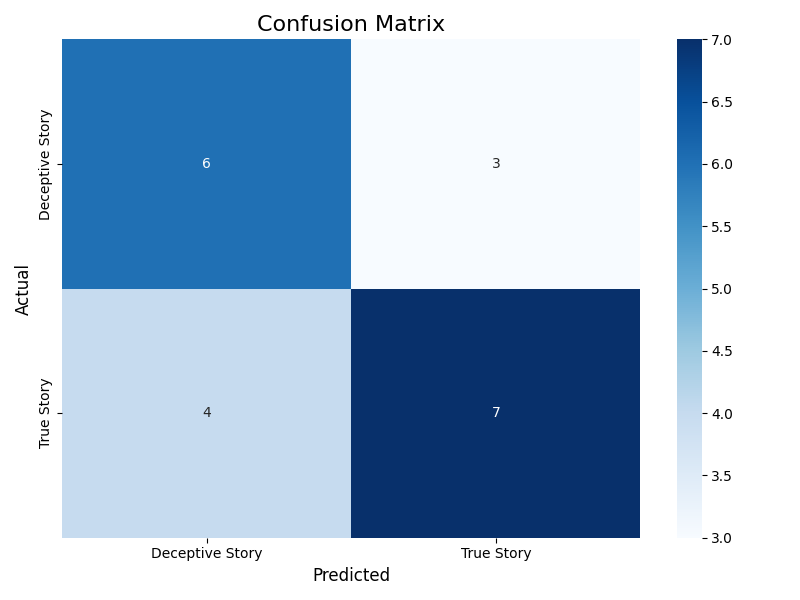

---

## Classification Report

The classification report is as follows:

| Class             | Precision | Recall | F1-Score | Support |
|-------------------|-----------|--------|----------|---------|
| Deceptive Story   | 0.55      | 0.67   | 0.60     | 9       |
| True Story        | 0.67      | 0.55   | 0.60     | 11      |
|-------------------|-----------|--------|----------|---------|
| **Accuracy**      |           |        | **0.60** | **20**  |
| **Macro Avg**     | 0.61      | 0.61   | 0.60     | 20      |
| **Weighted Avg**  | 0.61      | 0.61   | 0.60     | 20      |

---

### Analysis:
- **Precision**: The model performs slightly better on **True Stories** (0.67) than on **Deceptive Stories** (0.55).
- **Recall**: The model captures more **Deceptive Stories** (0.67) compared to **True Stories** (0.55).
- **Overall Accuracy**: 60%.

### Visualizations:
2. **Classification Report Heatmap**:
   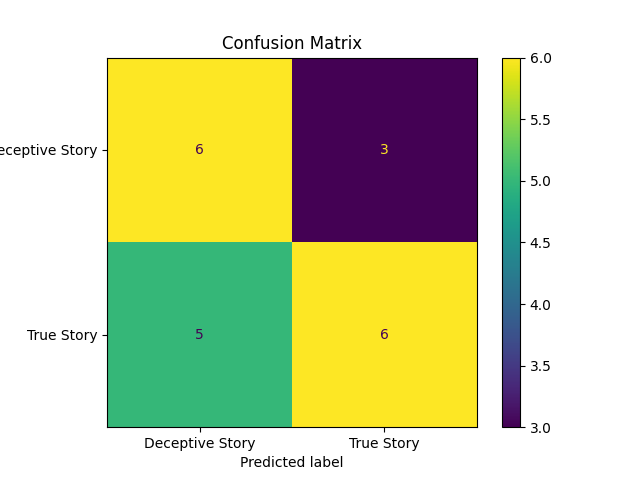




## Feature Importance

The feature importance plot shows:

- **MFCC_3** and **MFCC_1** are the most significant features, indicating their strong predictive power for the classification task.
- **Chroma features** such as Chroma_10, Chroma_7, and Chroma_8 also contribute significantly to the model's decisions.
- Other features like **MFCC_12** and **spectral centroid** show moderate importance.

### Visualization:
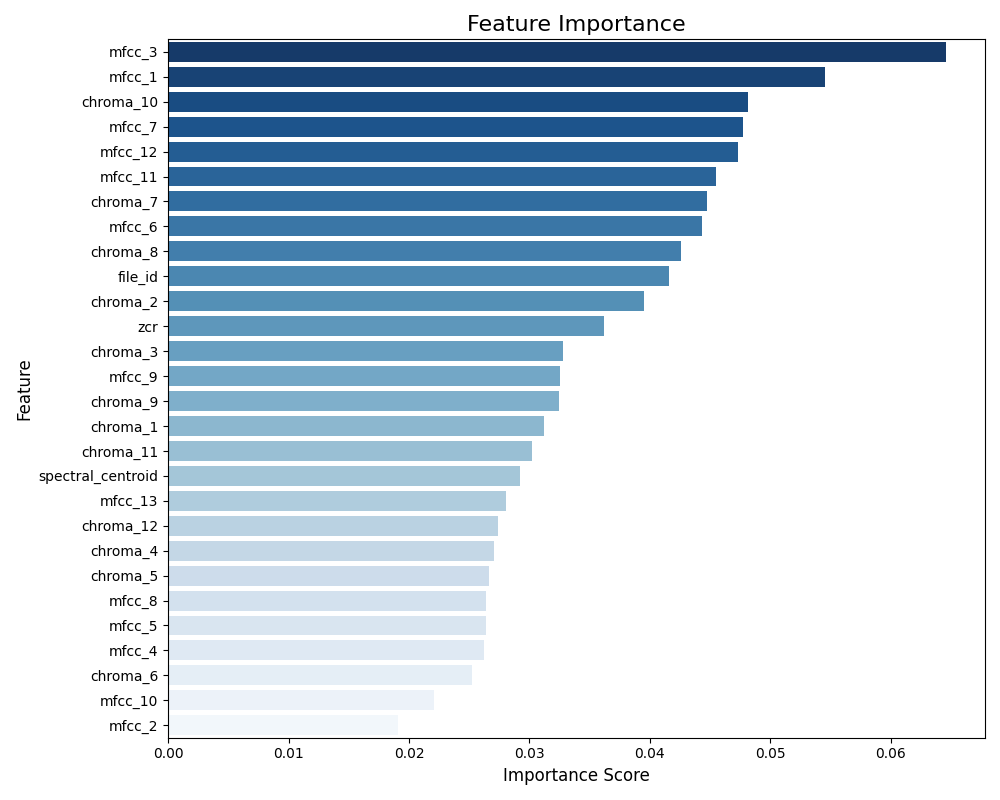


# 6.3 Observations and Limitations

"""
Observations:
- The model shows moderate performance with 60% accuracy.
- Misclassification rates differ between the two classes, indicating the need for further tuning.

Limitations:
- The dataset is small (100 samples), limiting the generalizability of the results.
- Some features may lack sufficient discriminative power and require further optimization.
"""

# 6.4 Suggestions for Improvement

"""
Feature Engineering:
- Investigate additional features such as pitch, rhythm, or emotion-based features.
- Apply dimensionality reduction techniques to focus on key features.

Model Optimization:
- Tune Random Forest hyperparameters (e.g., max depth, minimum samples split).
- Experiment with other classifiers like Support Vector Machines (SVM) or Gradient Boosted Trees.

Data Augmentation:
- Introduce synthetic audio samples or collect more recordings to expand the dataset.
"""

# Conclusion
"""
The experiments demonstrate a functional prediction pipeline and provide an initial analysis 
of the classification problem. While model performance is moderate, the results are reasonable 
given the limited data size and complexity of the task. Future work should focus on improving 
data quality and exploring more advanced modeling techniques to enhance accuracy.
"""


# 7 Conclusions

Your conclusions, suggestions for improvements, etc should go here.


## Key Takeaways

- The Random Forest Classifier achieved moderate success, with an accuracy of **60%**. However, there is a noticeable imbalance in precision and recall between "True Stories" and "Deceptive Stories."
- Audio features, particularly `MFCC` components, were highly influential in classification. Other features, such as `zcr` and chroma values, also played a significant role.

---

## Suggestions for Improvement

### 1. **Feature Engineering**
   - Extract temporal features such as energy entropy, zero-crossing rate variance, and pitch contours.
   - Apply dimensionality reduction methods like PCA (Principal Component Analysis) to address multicollinearity.

### 2. **Advanced Models**
   - Experiment with deep learning models such as CNNs (Convolutional Neural Networks) or RNNs (Recurrent Neural Networks), which are better suited for sequential data.
   - Consider transfer learning using pretrained audio models like OpenL3.

### 3. **Dataset Augmentation**
   - Apply techniques such as pitch shifting, time stretching, or adding background noise to augment the dataset, increasing its diversity and robustness.

### 4. **Hyperparameter Tuning**
   - Use grid search or randomized search to optimize hyperparameters such as the number of estimators, maximum depth, and minimum samples per leaf in the Random Forest model.

---

## Summary
The project demonstrated that basic audio features, such as MFCCs and chroma, can differentiate between "True Stories" and "Deceptive Stories." Despite moderate success, there is significant room for improvement, especially in terms of model choice, feature engineering, and dataset preparation.

---

# 8 References

Acknowledge others here (books, papers, repositories, libraries, tools) 



## Books
1. **"Pattern Recognition and Machine Learning"** by Christopher Bishop  
   - Referenced for understanding the basics of Random Forest and evaluation metrics like precision, recall, and F1-score.

2. **"Deep Learning"** by Ian Goodfellow, Yoshua Bengio, and Aaron Courville  
   - Used for exploring advanced techniques like feature extraction from audio and introducing deep learning concepts.

---


## Repositories
1. **CBU0521DD Dataset Repository**  
   - Source of the audio data and metadata used for classification.

2. **Scikit-learn Documentation**  
   - Provided implementation guidance and details on Random Forest Classifier and evaluation metrics.

3. **Librosa Documentation**  
   - For understanding the extraction of audio features like MFCCs, chroma, and spectral centroid.

---

## Libraries
1. **Librosa**  
   - Used for feature extraction, including MFCCs, chroma, and spectral analysis.
2. **Pandas and Numpy**  
   - Essential tools for handling data manipulation and numerical computations.
3. **Scikit-learn**  
   - For implementing machine learning models and evaluation metrics.
4. **Matplotlib and Seaborn**  
   - For creating visualizations of feature distributions, correlation matrices, and classification performance.

---

## Tools
1. **Jupyter Notebook**  
   - Utilized for documentation, visualization, and executing the entire project pipeline interactively.
2. **PyCharm**  
   - Python IDE used for developing and organizing the project efficiently.
3. **Excel**  
   - Used for an initial review and understanding of the dataset (e.g., inspecting the CSV file).

---
